# t-ETE Plot of Dataset

Remove outliers iteratively to plot all entire dataset


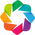

In [40]:
import holoviews as hv
import pandas as pd 
import numpy as np
from sklearn.manifold import TSNE

from tete import tete

from rnaseq_lib.utils import mkdir_p
from rnaseq_lib.de import get_l2fc
from rnaseq_lib.utils.tissues import return_samples

hv.extension('bokeh')

In [15]:
samples = return_samples()

In [4]:
df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)
df.head()

,TCGA-AD-5900-01,TCGA-BP-4968-01,TCGA-NG-A4VU-01,TCGA-CG-4305-01,TCGA-AO-A03M-01,TCGA-ZH-A8Y6-01,TCGA-HT-7686-01,TCGA-BR-6458-11,TCGA-29-1699-01,TCGA-KK-A6E1-01,...,GTEX-ZUA1-0226-SM-5NQ9Q,GTEX-Q734-0526-SM-2I3EH,GTEX-Y5V6-0526-SM-4VBRV,GTEX-1192X-3126-SM-5N9BY,GTEX-13X6H-0526-SM-5LU4Q,K-562-SM-3MJHH,GTEX-11GSO-2326-SM-5A5LX,GTEX-YJ8A-1126-SM-5IFJU,GTEX-RU1J-0226-SM-2TF5Y,GTEX-12BJ1-0426-SM-5FQSO
ENSG00000116032.5,4.381288,1.511815,1.430657,0.986667,1.945771,0.903716,0.000000,0.000000,8.441424,3.926956,...,14.301939,77.979912,15.608325,8.313450,31.846108,15.292863,14.530338,17.417563,17.747865,17.676720
ENSG00000171174.13,87.625753,656.631497,133.766402,154.413440,128.420862,232.255080,128.729659,154.710834,341.643175,244.453014,...,150.170357,172.455574,272.625414,137.765738,130.569042,16.822149,61.350314,592.197153,133.108991,229.797358
ENSG00000149136.7,7932.321326,4682.089977,7258.436790,3999.949436,5836.533582,2959.670762,8468.201070,3971.274572,6338.336754,8266.242476,...,5958.545231,6014.950501,4380.736621,3552.218287,6362.852322,8834.176959,4249.316508,6886.904540,5096.595360,6787.860414
ENSG00000078237.5,196.062623,330.583471,273.255431,533.787036,200.025221,212.373322,576.032718,278.915306,336.719011,295.503442,...,294.977487,245.936645,339.220935,263.655119,128.976736,29.566201,416.536345,404.087469,221.848318,203.282278
ENSG00000146083.11,1343.412332,2331.722131,2469.313472,1886.014639,1978.459577,2124.185077,1780.760286,2426.345260,5307.076163,2677.202284,...,3019.496818,3705.545422,2409.925419,2769.566381,3585.871729,2052.811922,2504.061513,4756.736545,3531.825224,3517.667246


In [84]:
# Create list of labels for samples
labels, tissues, sample_list = [], [], []
tissue_set = ['Bladder', 'Brain', 'Breast', 'Esophagus', 'Kidney', 'Liver', 'Lung', 'Stomach', 'Thyroid']
for tissue in sorted(tissue_set):
    labels.extend(['Tumor' if x.endswith('-01') 
              else 'Normal' if x.endswith('-11') 
              else 'GTEx' for x in samples[tissue]])
    sample_list.extend([x for x in samples[tissue]])
    tissues.extend([tissue for _ in samples[tissue]])

# Subset dataframe
sub = df[sample_list]

# Run t-ETE          
z = tete(np.array(sub.T), num_dims=2, num_neighbs=20)

In [89]:
# Create plotting object
plot = pd.DataFrame()
plot['sample'] = sub.columns
plot['tissue'] = tissues
plot['label'] = labels
plot['x'] = z[:, 0]
plot['y'] = z[:, 1]

# Create scatter object
scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'tissue', 'sample'], group='TCGA and GTEx')

In [90]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='tab20', size=5, alpha=0.5)
%%opts Scatter [legend_position='left' show_legend=True]
scatter

:Scatter   [x]   (y,tissue,sample)

t-ETE is useful for identification of outliers. Here it identifies two: TCGA-CC-5259-01 and GTEX-WI4N-2026-SM-4OOS7

In [111]:
removed_ids = ['TCGA-CC-5259-01', 'GTEX-WI4N-2026-SM-4OOS7']
for i in removed_ids:
    try:
        sub.drop(i, inplace=True, axis=1)
    except ValueError:
        pass

In [116]:
labels, tissues, sample_list = [], [], []
for tissue in sorted(tissue_set):
    ids = [x for x in samples[tissue] if x not in removed_ids]
    labels.extend(['Tumor' if x.endswith('-01') 
              else 'Normal' if x.endswith('-11') 
              else 'GTEx' for x in ids])
    sample_list.extend([x for x in ids])
    tissues.extend([tissue for _ in ids])

In [118]:
# Run t-ETE          
z = tete(np.array(sub.T), num_dims=2, num_neighbs=20)
# Create plotting object
plot = pd.DataFrame()
plot['sample'] = sub.columns
plot['tissue'] = tissues
plot['label'] = labels
plot['x'] = z[:, 0]
plot['y'] = z[:, 1]

# Create scatter object
scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'tissue', 'sample'], group='TCGA and GTEx')

In [119]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='Set1', size=5, alpha=0.5)
scatter

:Scatter   [x]   (y,tissue,sample)

### Adjust num_neighbs

In [120]:
# Run t-ETE          
z = tete(np.array(sub.T), num_dims=2, num_neighbs=50)
# Create plotting object
plot = pd.DataFrame()
plot['sample'] = sub.columns
plot['tissue'] = tissues
plot['label'] = labels
plot['x'] = z[:, 0]
plot['y'] = z[:, 1]

# Create scatter object
scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'tissue', 'sample'], group='TCGA and GTEx')

In [121]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='Set1', size=5, alpha=0.5)
scatter

:Scatter   [x]   (y,tissue,sample)

# t-SNE of Dataset

In [123]:
type(plot) == pd.DataFrame

True

In [122]:
type(plot)

pandas.core.frame.DataFrame

In [ ]:
# Run t-ETE          
z = TSNE(n_components=2, perplexity=70, learning_rate=1000).fit_transform(np.array(sub.T))
# Create plotting object
plot = pd.DataFrame()
plot['sample'] = sub.columns
plot['tissue'] = tissues
plot['label'] = labels
plot['x'] = z[:, 0]
plot['y'] = z[:, 1]

# Create scatter object
scatter_p50_lr1000 = hv.Scatter(plot, kdims=['x'], vdims=['y', 'tissue', 'sample'], group='TCGA and GTEx')

In [74]:
%%opts Scatter [width=900 height=500 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='tab20', size=5, alpha=0.5)
%%opts Scatter [legend_position='left' show_legend=True]
scatter_p50_lr1000

:Scatter   [x]   (y,tissue,sample)